Sentimental classifier for the ImDB Movie reviews

In [1]:
!pip install gensim

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim
from gensim import models
import spacy

In [3]:
df=pd.read_csv("/content/movie.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [4]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


In [5]:
print(df.duplicated().sum())
#duplicates need to be removed

277


In [6]:
df=df.drop_duplicates()
print(df.duplicated().sum())
#removed all duplicate rows

0


In [7]:
print(df.isnull().sum)
#no missing values as can also be seen using df.info

<bound method DataFrame.sum of         text  label
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
39995  False  False
39996  False  False
39997  False  False
39998  False  False
39999  False  False

[39723 rows x 2 columns]>


In [8]:
print(df['label'].unique())
#all labels are either 1 or 0, data is not inconsistent

[0 1]


label
1    19908
0    19815
Name: count, dtype: int64


<Axes: xlabel='label'>

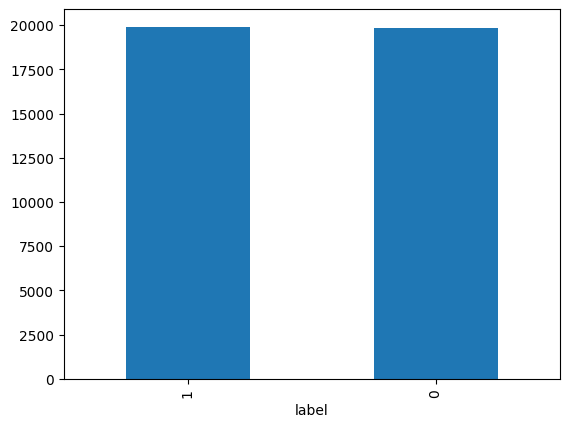

In [9]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind="bar")
#the data is balanced

In [10]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


label
0    1293.136008
1    1329.118143
Name: length, dtype: float64


,text,label,length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983


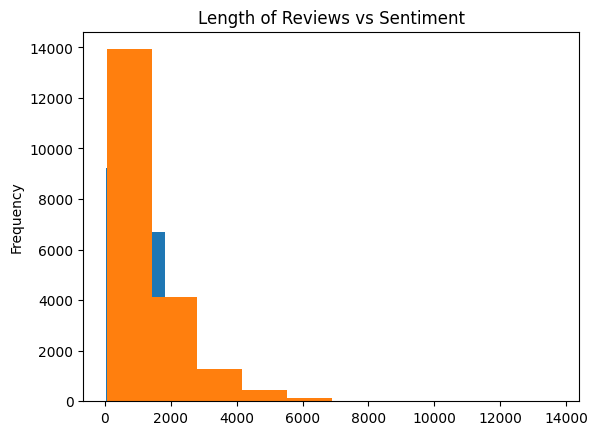

In [11]:
df['length']=df['text'].apply(len)
df.groupby('label')['length'].plot(kind="hist")
plt.title("Length of Reviews vs Sentiment")

avg_lengths=df.groupby('label')['length'].mean()
print(avg_lengths)
df.head()

In [12]:
df['text'] = df['text'].str.lower()
df.head()

,text,label,length
0,i grew up (b. 1965) watching and loving the th...,0,874
1,"when i put this movie in my dvd player, and sa...",0,1811
2,why do people who do not know what a particula...,0,983
3,even though i have great interest in biblical ...,0,351
4,im a die hard dads army fan and nothing will e...,1,983


In [13]:
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df['text'] = df['text'].str.replace(r'\d+', '', regex=True)
df.head()

,text,label,length
0,i grew up b watching and loving the thunderbi...,0,874
1,when i put this movie in my dvd player and sat...,0,1811
2,why do people who do not know what a particula...,0,983
3,even though i have great interest in biblical ...,0,351
4,im a die hard dads army fan and nothing will e...,1,983


In [14]:
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['text']=df['text'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text,label,length
0,"[i, grew, up, b, watching, and, loving, the, t...",0,874
1,"[when, i, put, this, movie, in, my, dvd, playe...",0,1811
2,"[why, do, people, who, do, not, know, what, a,...",0,983
3,"[even, though, i, have, great, interest, in, b...",0,351
4,"[im, a, die, hard, dads, army, fan, and, nothi...",1,983


In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,length
0,"[grew, b, watching, loving, thunderbirds, mate...",0,874
1,"[put, movie, dvd, player, sat, coke, chips, ex...",0,1811
2,"[people, know, particular, time, past, like, f...",0,983
3,"[even, though, great, interest, biblical, movi...",0,351
4,"[im, die, hard, dads, army, fan, nothing, ever...",1,983


In [16]:
df.to_csv('cleaned_text_data.csv', index=False)

In [17]:
from google.colab import files
files.download('cleaned_text_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
tokenizer = Tokenizer()
sentences=df['text']
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'br': 1, 'movie': 2, 'film': 3, 'one': 4, 'like': 5, 'good': 6, 'even': 7, 'would': 8, 'time': 9, 'really': 10, 'see': 11, 'story': 12, 'much': 13, 'well': 14, 'get': 15, 'also': 16, 'great': 17, 'bad': 18, 'people': 19, 'first': 20, 'dont': 21, 'movies': 22, 'make': 23, 'films': 24, 'made': 25, 'could': 26, 'way': 27, 'characters': 28, 'think': 29, 'watch': 30, 'many': 31, 'seen': 32, 'two': 33, 'character': 34, 'never': 35, 'love': 36, 'acting': 37, 'little': 38, 'plot': 39, 'best': 40, 'know': 41, 'show': 42, 'life': 43, 'ever': 44, 'better': 45, 'still': 46, 'say': 47, 'end': 48, 'scene': 49, 'man': 50, 'scenes': 51, 'something': 52, 'go': 53, 'im': 54, 'back': 55, 'real': 56, 'watching': 57, 'doesnt': 58, 'thing': 59, 'didnt': 60, 'actors': 61, 'years': 62, 'actually': 63, 'though': 64, 'another': 65, 'makes': 66, 'look': 67, 'funny': 68, 'nothing': 69, 'find': 70, 'going': 71, 'work': 72, 'lot': 73, 'new': 74, 'every': 75, 'old': 76, 'part': 77, 'us': 78, 'director': 79, 'cant':

In [19]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df_stemm=df.copy()
df_stemm['text'] = df_stemm['text'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

df_stemm.head()

#stemmed words like movie and people into movi and peopl which is undesirable

,text,label,length
0,"[grew, b, watch, love, thunderbird, mate, scho...",0,874
1,"[put, movi, dvd, player, sat, coke, chip, expe...",0,1811
2,"[peopl, know, particular, time, past, like, fe...",0,983
3,"[even, though, great, interest, biblic, movi, ...",0,351
4,"[im, die, hard, dad, armi, fan, noth, ever, ch...",1,983


In [20]:
nlp=spacy.load("en_core_web_sm")
df_lemm=df.copy()
df_lemm['text']=df_lemm['text'].apply(lambda tokens: [token.lemma_ for token in nlp(' '.join(tokens))])
df_lemm.head()

#the word "nothing" remains as it is and is not trimmed down to "noth"

,text,label,length
0,"[grow, b, watch, love, thunderbird, mate, scho...",0,874
1,"[put, movie, dvd, player, sit, coke, chip, exp...",0,1811
2,"[people, know, particular, time, past, like, f...",0,983
3,"[even, though, great, interest, biblical, movi...",0,351
4,"[I, m, die, hard, dad, army, fan, nothing, eve...",1,983


In [22]:
df=df_lemm.copy()
df['processed_text']=df['text'].apply(lambda tokens: ' '.join(tokens))
df.head()

,text,label,length,processed_text
0,"[grow, b, watch, love, thunderbird, mate, scho...",0,874,grow b watch love thunderbird mate school watc...
1,"[put, movie, dvd, player, sit, coke, chip, exp...",0,1811,put movie dvd player sit coke chip expectation...
2,"[people, know, particular, time, past, like, f...",0,983,people know particular time past like feel nee...
3,"[even, though, great, interest, biblical, movi...",0,351,even though great interest biblical movie bore...
4,"[I, m, die, hard, dad, army, fan, nothing, eve...",1,983,I m die hard dad army fan nothing ever change ...


In [24]:
df[['processed_text', 'label', 'length']].to_csv('processed_reviews.csv', index=False)

In [25]:
files.download('processed_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df=pd.read_csv("/content/processed_reviews.csv")

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True, max_features=5000, min_df=5, max_df=0.8)
X=cv.fit_transform(df['processed_text'])
X=X.toarray()
sorted(cv.vocabulary_.keys())

['aaron',
 'abandon',
 'abc',
 'ability',
 'able',
 'aboard',
 'abound',
 'aboutbr',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absurd',
 'absurdity',
 'abuse',
 'abusive',
 'abysmal',
 'academy',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'access',
 'accessible',
 'accident',
 'accidentally',
 'acclaim',
 'accompany',
 'accomplish',
 'accord',
 'account',
 'accuracy',
 'accurate',
 'accurately',
 'accuse',
 'ace',
 'achieve',
 'achievement',
 'acid',
 'acknowledge',
 'acquire',
 'across',
 'act',
 'acting',
 'actingbr',
 'action',
 'active',
 'activity',
 'actor',
 'actors',
 'actress',
 'actual',
 'actually',
 'ad',
 'adam',
 'adams',
 'adapt',
 'adaptation',
 'add',
 'addict',
 'addiction',
 'addition',
 'additional',
 'additionally',
 'address',
 'adequate',
 'admirable',
 'admire',
 'admirer',
 'admit',
 'admittedly',
 'adolescent',
 'adopt',
 'adorable',
 'adore',
 'adult',
 'advance',
 'advanced',
 'advantage',
 'adventure',

In [5]:
from sklearn.model_selection import train_test_split

y=df['label']
X_train_cv,X_test_cv,y_train_cv,y_test_cv=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [16]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": BernoulliNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM (LinearSVC)": LinearSVC()
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_cv, y_train_cv)
    y_pred = model.predict(X_test_cv)
    print("Accuracy:", accuracy_score(y_test_cv, y_pred))
    print("F1 Score:", f1_score(y_test_cv, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test_cv, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_cv, y_pred))


Logistic Regression
Accuracy: 0.8614222781623663
F1 Score: 0.8618742943168988
ROC-AUC: 0.8614562013392044
Confusion Matrix:
 [[3409  582]
 [ 519 3435]]

Naive Bayes
Accuracy: 0.8488357457520453
F1 Score: 0.8479939248196431
ROC-AUC: 0.8488283640720705
Confusion Matrix:
 [[3394  597]
 [ 604 3350]]

Random Forest
Accuracy: 0.8370044052863436
F1 Score: 0.8354301690176642
ROC-AUC: 0.8369780095756676
Confusion Matrix:
 [[3363  628]
 [ 667 3287]]

SVM (LinearSVC)
Accuracy: 0.8466960352422908
F1 Score: 0.8470233609645818
ROC-AUC: 0.8467243635052919
Confusion Matrix:
 [[3355  636]
 [ 582 3372]]


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
transformed=tfidf.fit_transform(df['processed_text'])
df_tfidf = pd.DataFrame(transformed[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_tfidf = df_tfidf.sort_values(by='TF-IDF', ascending=False)
print(df_tfidf)

#thunderbird is the most imp feature here according to tf-idf
#tf-idf prioritises words unique to the document
#prevents commonly occuring words from getting more importance just because they appear often
#will use tf-idf features further

               TF-IDF
thunderbird  0.547146
school       0.259750
child        0.160458
snappy       0.160122
lunch        0.151223
...               ...
fiery        0.000000
fifteen      0.000000
fifth        0.000000
fifty        0.000000
zucker       0.000000

[10000 rows x 1 columns]


In [11]:
from sklearn.model_selection import train_test_split

x=df['processed_text']
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [36]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": BernoulliNB(),
    "Random Forest": RandomForestClassifier(),
    "SVM (LinearSVC)": LinearSVC()
}

for name, model in models.items():
    print(f"\n{name}")
    model.fit(x_train_tfidf, y_train)
    y_pred = model.predict(x_test_tfidf)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression
Accuracy: 0.8838263058527376
F1 Score: 0.8847546510176052
ROC-AUC: 0.8838829893816473
Confusion Matrix:
 [[3479  512]
 [ 411 3543]]

Naive Bayes
Accuracy: 0.8483322844556325
F1 Score: 0.8461636665390017
ROC-AUC: 0.8482850323191774
Confusion Matrix:
 [[3426  565]
 [ 640 3314]]

Random Forest
Accuracy: 0.8449339207048459
F1 Score: 0.8424552429667519
ROC-AUC: 0.8448789746580793
Confusion Matrix:
 [[3419  572]
 [ 660 3294]]

SVM (LinearSVC)
Accuracy: 0.879295154185022
F1 Score: 0.8793558938231224
ROC-AUC: 0.8793165692611107
Confusion Matrix:
 [[3491  500]
 [ 459 3495]]


Logistic Regression: worked better for tfidf

Naive Bayes: worked equally well for both tfidf and cv

Random Forest: worked better for tfidf

Linear SVC: worked better for tfidf

In [6]:
#a simple neural network with a few dense layers

import tensorflow as tf
from tensorflow import keras

from keras.utils import to_categorical
from keras import models
from keras import layers

In [7]:
model = models.Sequential()

NN for CV

In [8]:
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(5000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       250,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255,201 (996.88 KB)

 Trainable params: 255,201 (996.88 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [12]:
result_cv=model.fit(
    X_train_cv, y_train,
    epochs=10,
    batch_size=512,
    validation_data=(X_test_cv, y_test)
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.6776 - loss: 0.5937 - val_accuracy: 0.8767 - val_loss: 0.3120
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8912 - loss: 0.2769 - val_accuracy: 0.8802 - val_loss: 0.2971
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9206 - loss: 0.2102 - val_accuracy: 0.8801 - val_loss: 0.3081
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9395 - loss: 0.1663 - val_accuracy: 0.8736 - val_loss: 0.3362
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9589 - loss: 0.1216 - val_accuracy: 0.8724 - val_loss: 0.3830
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9719 - loss: 0.0868 - val_accuracy: 0.8706 - val_loss: 0.4159
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9803 - loss: 0.0629 - val_accuracy: 0.8683 - val_loss: 0.4889
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9832 - loss: 0.0526 - val_accuracy: 0.8656 - v

In [17]:
X_train_nn_cv = X_train_cv
X_train_nn_cv = X_test_cv

y_pred_cv = model.predict(X_train_nn_cv)
y_pred_cv = (y_pred_cv > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_cv))
print("F1 Score:", f1_score(y_test, y_pred_cv))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_cv))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cv))

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8635619886721209
F1 Score: 0.8634416729654825
ROC-AUC: 0.8635766146566244
Confusion Matrix:
 [[3434  557]
 [ 527 3427]]


NN for Tf-Idf

In [11]:
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [16]:
result_tfidf=model.fit(
    x_train_tfidf, y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_test_tfidf, y_test)
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.6644 - loss: 0.6391 - val_accuracy: 0.8838 - val_loss: 0.2876
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9025 - loss: 0.2467 - val_accuracy: 0.8863 - val_loss: 0.2795
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.9387 - loss: 0.1764 - val_accuracy: 0.8797 - val_loss: 0.3018
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9591 - loss: 0.1302 - val_accuracy: 0.8783 - val_loss: 0.3321
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9711 - loss: 0.0960 - val_accuracy: 0.8730 - val_loss: 0.3886
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9808 - loss: 0.0659 - val_accuracy: 0.8697 - val_loss: 0.4511
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9892 - loss: 0.0418 - val_accuracy: 0.8715 - val_loss: 0.5053
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9923 - loss: 0.0291 - val_accuracy: 0.8696 - v

In [17]:
x_train_nn_tfidf = x_train_tfidf.toarray()
x_test_nn_tfidf = x_test_tfidf.toarray()

y_pred_tfidf = model.predict(x_test_nn_tfidf)
y_pred_tfidf = (y_pred_tfidf > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("F1 Score:", f1_score(y_test, y_pred_tfidf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8677155443675267
F1 Score: 0.8683122415737377
ROC-AUC: 0.8677554657311272
Confusion Matrix:
 [[3429  562]
 [ 489 3465]]


Result- The nn with tf-idf performed slightly better than with cv features